In [24]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import ParameterGrid
from sklearn.mixture import GaussianMixture

In [25]:
df = pd.read_csv('soci_econ_country_profiles.csv')

df.head()

,Unnamed: 0,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),...,"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,...,NaN,79.726,72.924,76.372000,0.856138,22572521.0,21472290.0,10.955501,12.929913,91.749
1,1,Australia,Oceania,7692060,24451,3.2,99.3,1230859,2.4,51352.2,...,1.948647,84.600,80.500,82.500000,2.007966,12349632.0,12252228.0,21.915859,64.110306,85.904
2,2,Austria,WesternEurope,83871,8736,106.0,96.2,376967,1.0,44117.7,...,2.081269,84.000,79.400,81.643902,0.756179,4478340.0,4319226.0,25.355237,27.024073,58.094
3,3,Belarus,EasternEurope,207600,9468,46.7,87.0,54609,-3.9,5750.8,...,6.031837,79.200,69.300,74.129268,1.162417,5077542.0,4420722.0,13.019006,2.933101,78.134
4,4,Belgium,WesternEurope,30528,11429,377.5,97.3,455107,1.5,40277.8,...,2.125971,83.900,79.200,81.492683,0.910371,5766141.0,5609017.0,23.399721,33.727746,97.961


In [26]:
df.describe(include='all')

,Unnamed: 0,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),...,"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
count,66.000000,66,66,6.600000e+01,6.600000e+01,66.000000,66.000000,6.600000e+01,66.000000,66.000000,...,64.000000,66.000000,66.000000,66.000000,63.000000,6.600000e+01,6.600000e+01,58.000000,57.000000,66.000000
unique,NaN,66,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Argentina,EasternEurope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,32.500000,NaN,NaN,1.383839e+06,8.655136e+04,367.760606,103.093939,1.054143e+06,2.503030,23531.648485,...,3.061447,80.681818,75.288773,77.919495,1.921359,4.264709e+07,4.363543e+07,17.514902,26.399717,72.319212
std,19.196354,NaN,NaN,3.110735e+06,2.381736e+05,1296.705411,32.661861,2.626195e+06,4.084077,20582.322358,...,4.198392,4.239907,4.760363,4.403602,1.486484,1.144292e+08,1.218393e+08,6.354347,14.262319,17.747912
min,0.000000,NaN,NaN,7.190000e+02,1.180000e+03,3.200000,85.100000,1.005200e+04,-9.900000,1410.400000,...,-0.838195,67.064000,60.162000,63.538000,0.310632,5.891320e+05,5.905480e+05,0.066457,2.026514,18.384000
25%,16.250000,NaN,NaN,6.536700e+04,7.155000e+03,46.725000,95.450000,1.668350e+05,1.425000,6253.775000,...,1.290593,78.507000,72.532000,75.462122,1.076050,3.434816e+06,3.428920e+06,13.026485,16.217291,58.596750
50%,32.500000,NaN,NaN,2.840535e+05,1.886700e+04,104.100000,97.350000,3.052720e+05,2.400000,15323.500000,...,1.961454,80.843000,75.058500,77.790244,1.422609,9.713157e+06,9.315708e+06,16.978874,24.019106,75.058000
75%,48.750000,NaN,NaN,7.929618e+05,6.588150e+04,211.325000,100.150000,7.422105e+05,3.775000,40398.550000,...,3.464844,84.000000,79.475000,81.640854,2.207984,3.422686e+07,3.254150e+07,22.450806,34.292679,86.162000


In [27]:
df_econ= df[['Cost Of Living Index',
             'Restaurant Price Index',
             'Rent Index',
             'Grocery Index',
             'Local Purchasing Power Index'
             ]]

In [28]:
df_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cost Of Living Index          66 non-null     float64
 1   Restaurant Price Index        66 non-null     float64
 2   Rent Index                    66 non-null     float64
 3   Grocery Index                 66 non-null     float64
 4   Local Purchasing Power Index  66 non-null     float64
dtypes: float64(5)
memory usage: 2.7 KB


In [29]:
df_econ.isna().sum()

Cost Of Living Index            0
Restaurant Price Index          0
Rent Index                      0
Grocery Index                   0
Local Purchasing Power Index    0
dtype: int64

In [30]:
df_econ = df_econ.interpolate(method='linear')

df_econ.isna().sum()

Cost Of Living Index            0
Restaurant Price Index          0
Rent Index                      0
Grocery Index                   0
Local Purchasing Power Index    0
dtype: int64

In [31]:

z_scores = np.abs(zscore(df_econ))

threshold = 3


df_econ = df_econ[(z_scores < threshold).all(axis=1)]


print(f"Data tanpa outlier: {df_econ.shape}")


Data tanpa outlier: (64, 5)


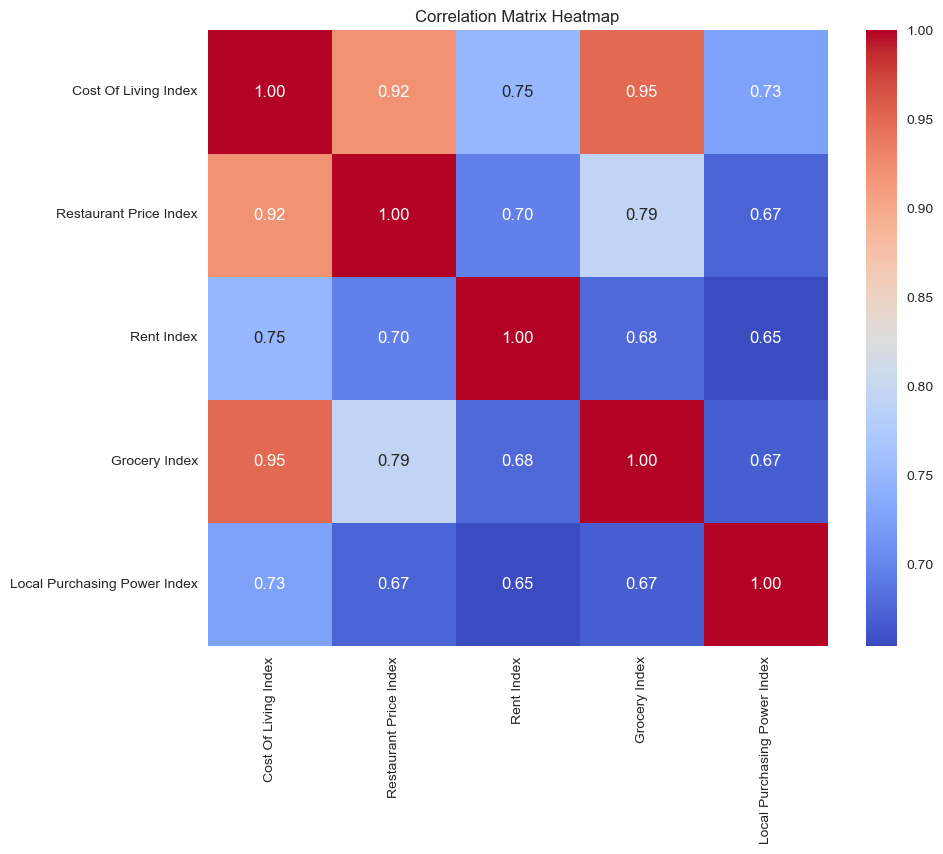

In [32]:
econ_corr = df_econ.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(econ_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [33]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_econ) 

In [ ]:


pca = PCA(n_components=0.95)  
reduced_data = pca.fit_transform(scaled_data)


In [ ]:
param_grid = {
    'n_components': [2, 3, 4, 5, 6, 7, 8],  # Jumlah cluster yang akan diuji
    'covariance_type': ['full', 'tied', 'diag', 'spherical']  # Jenis kovarians yang diuji
}

# Menyimpan hasil Silhouette Score
best_score = -1
best_params = None
best_gmm = None


for params in ParameterGrid(param_grid):
    gmm = GaussianMixture(n_components=params['n_components'], 
                          covariance_type=params['covariance_type'], 
                          random_state=42)
    
    # Fit GMM dan prediksi label cluster
    gmm_labels = gmm.fit_predict(reduced_data)  

    # Hitung Silhouette Score
    score = silhouette_score(reduced_data, gmm_labels)
    print(f"n_components: {params['n_components']}, covariance_type: {params['covariance_type']}, Silhouette Score: {score:.4f}")
    
    if score > best_score:
        best_score = score
        best_params = params
        best_gmm = gmm

# 5. Menampilkan hasil terbaik
print(f"\nModel terbaik dengan Silhouette Score {best_score:.4f}:")
print(f"n_components: {best_params['n_components']}, covariance_type: {best_params['covariance_type']}")

d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmea

n_components: 2, covariance_type: full, Silhouette Score: 0.6160
n_components: 3, covariance_type: full, Silhouette Score: 0.3909
n_components: 4, covariance_type: full, Silhouette Score: 0.2858
n_components: 5, covariance_type: full, Silhouette Score: 0.2987
n_components: 6, covariance_type: full, Silhouette Score: 0.3011
n_components: 7, covariance_type: full, Silhouette Score: 0.3202
n_components: 8, covariance_type: full, Silhouette Score: 0.2819
n_components: 2, covariance_type: tied, Silhouette Score: 0.6102
n_components: 3, covariance_type: tied, Silhouette Score: 0.4396
n_components: 4, covariance_type: tied, Silhouette Score: 0.4396
n_components: 5, covariance_type: tied, Silhouette Score: 0.4564
n_components: 6, covariance_type: tied, Silhouette Score: 0.3496
n_components: 7, covariance_type: tied, Silhouette Score: 0.3459
n_components: 8, covariance_type: tied, Silhouette Score: 0.2690
n_components: 2, covariance_type: diag, Silhouette Score: 0.5917
n_components: 3, covarian

d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Anaconda3\envs\subekMLdicoding\lib\site-packages\sklearn\cluster\_kmea

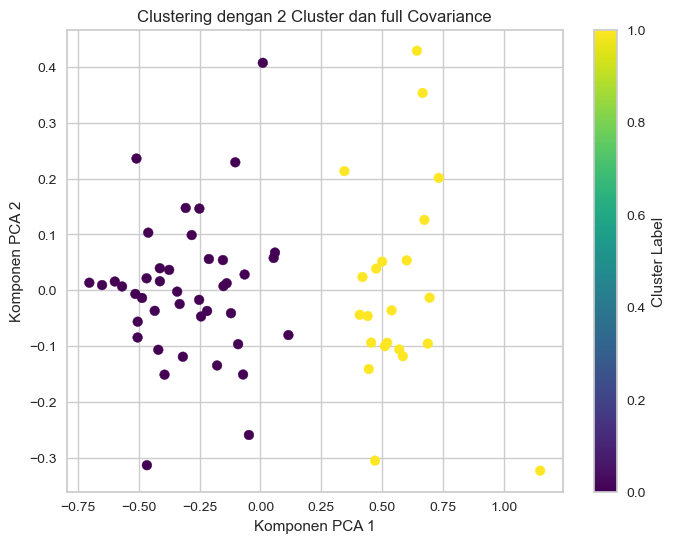

In [36]:
best_gmm_labels = best_gmm.predict(reduced_data)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=best_gmm_labels, cmap='viridis')
plt.title(f"Clustering dengan {best_params['n_components']} Cluster dan {best_params['covariance_type']} Covariance")
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.colorbar(label='Cluster Label')
plt.show()
